# Goal: crop satellite image to area of europe.

In [1]:
import satpy
import numpy as np
from pyresample.geometry import AreaDefinition, create_area_def
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [98]:
filenames = ['../data/satellite/MSG3-SEVI-MSG15-0100-NA-20230401001241.842000000Z-NA.nat']

In [99]:
from satpy import Scene
scn = Scene(reader="seviri_l1b_native", filenames=filenames)
scn.load([
 'IR_016',
 'IR_039',
 'IR_087',
 'IR_097',
 'IR_108',
 'IR_120',
 'IR_134',
 'VIS006',
 'VIS008',
 'WV_062',
 'WV_073'], upper_right_corner="NE")

/home/mark/miniconda3/envs/torch/lib/python3.10/site-packages/satpy/readers/seviri_base.py:386: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataset.coords['acq_time'] = ('y', acq_time)
/home/mark/miniconda3/envs/torch/lib/python3.10/site-packages/satpy/readers/seviri_base.py:386: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or 

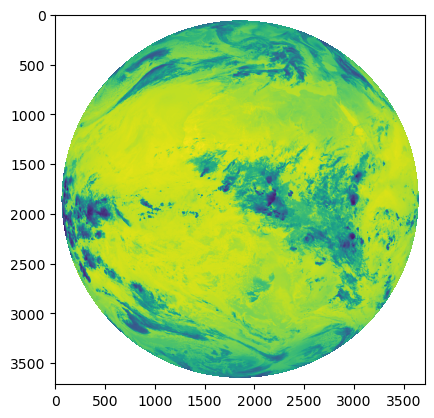

In [100]:
plt.imshow(scn['IR_120'])

In [6]:
area_extent=[0, 5000, 300000, 305000]

In [7]:
proj_string = scn['IR_120'].attrs['area'].proj4_string

/tmp/ipykernel_32245/1555331728.py:1: DeprecationWarning: 'proj4_string' is deprecated, please use 'proj_str' instead.
  proj_string = scn['IR_120'].attrs['area'].proj4_string
/home/mark/miniconda3/envs/torch/lib/python3.10/site-packages/pyproj/crs/crs.py:1296: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [8]:
scn['IR_120'].attrs['area']

Area ID: msg_seviri_fes_3km
Description: MSG SEVIRI Full Earth Scanning service area definition with 3 km resolution
Projection: {'a': '6378169', 'h': '35785831', 'lon_0': '0', 'no_defs': 'None', 'proj': 'geos', 'rf': '295.488065897014', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 3712
Number of rows: 3712
Area extent: (-5570248.4773, -5567248.0742, 5567248.0742, 5570248.4773)

In [9]:
my_dict = {'a': '6378169', 'h': '35785831', 'lon_0': '50', 'no_defs': 'None', 'proj': 'merc', 'rf': '295.488065897014', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}

In [10]:
area_def = AreaDefinition.from_extent("west_europe", area_extent=[5567248.0742, 5570248.4773, -5570248.4773, -5567248.0742], shape=(3000, 3000), projection=proj_string, units="m")

In [11]:
pp = '+proj=geos +h=35785831 +lat_0=52.5 +lon_0=5.5 +ellps=WGS84'

In [12]:
mi_area = create_area_def('my_area', projection=pp,
                              width=300, height=300,
                              area_extent=[-1, 50, 5, 55], units="deg")

In [13]:
7 + 11

18

In [14]:
58-40

18

In [15]:
result = scn.crop(mi_area)

In [16]:
result['IR_016'].values.shape

(90, 152)

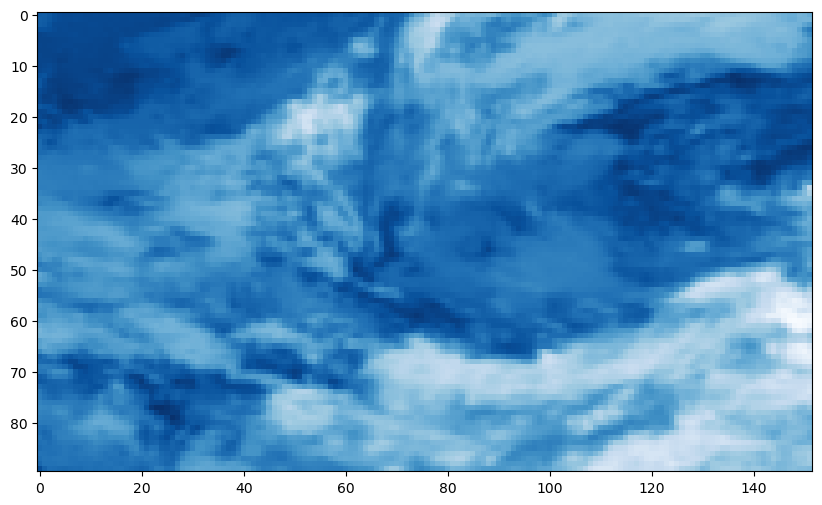

In [17]:
plt.figure(figsize=(10, 10))
plt.imshow(result['IR_120'].values, cmap="Blues")

In [18]:
mi_area_dos = create_area_def('my_area', projection=pp,
                              width=300, height=300,
                              area_extent=[0, 50, 10, 55], units="deg")

(90, 228)


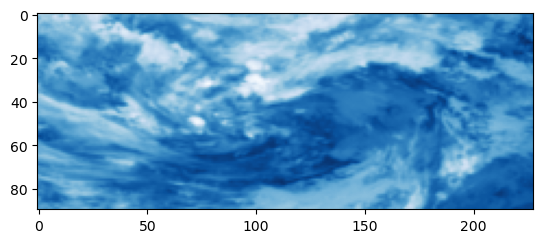

In [19]:
test = scn.crop(mi_area_dos)
print(test['IR_016'].values.shape)
plt.imshow(np.flipud(np.fliplr(test['IR_120'])), cmap='Blues')

In [20]:
np.max(test["VIS008"].values)

0.123048134

In [21]:
channels = [
 'IR_016',
 'IR_039',
 'IR_087',
 'IR_097',
 'IR_108',
 'IR_120',
 'IR_134',
 'VIS006',
 'VIS008',
 'WV_062',
 'WV_073']
my_test = np.array([test[c].values for c in channels])

/home/mark/miniconda3/envs/torch/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


In [22]:
np.max(my_test)

275.9356

In [23]:
my_test.shape

(11, 90, 228)

In [24]:
maxes = np.amax(my_test, axis=(1, 2))
mins = np.amin(my_test, axis=(1, 2))
std = np.std(my_test, axis=(1, 2))

In [25]:
maxes

array([2.39958301e-01, 2.73827789e+02, 2.73495026e+02, 2.42277969e+02,
       2.75935608e+02, 2.74675690e+02, 2.53072845e+02, 1.04521424e-01,
       1.23048134e-01, 2.34640823e+02, 2.49775436e+02], dtype=float32)

In [26]:
mins

array([  0.     , 218.41986, 223.4972 , 221.866  , 223.67929, 223.2217 ,
       222.50911,   0.     ,   0.     , 221.2196 , 222.1702 ],
      dtype=float32)

In [27]:
std

array([5.4427747e-02, 7.6730304e+00, 8.3269720e+00, 3.2600393e+00,
       9.1019077e+00, 9.1296492e+00, 5.4364629e+00, 5.0492710e-03,
       1.4300307e-02, 1.6935283e+00, 3.9072146e+00], dtype=float32)

In [28]:
dummy_image = np.ones((11, 64, 64))

In [29]:
dummy_image[0][0][0]

1.0

In [30]:
channels_first = dummy_image.reshape((64, 64, 11))

In [31]:
mins

array([  0.     , 218.41986, 223.4972 , 221.866  , 223.67929, 223.2217 ,
       222.50911,   0.     ,   0.     , 221.2196 , 222.1702 ],
      dtype=float32)

In [32]:
intermediate = channels_first - mins

In [33]:
result = intermediate.reshape(11, 64, 64)

In [34]:
result[3]

array([[-217.41986084, -222.49719238, -220.86599731, ...,    1.        ,
           1.        , -220.21960449],
       [-221.17019653,    1.        , -217.41986084, ..., -222.22169495,
        -221.5091095 ,    1.        ],
       [   1.        , -220.21960449, -221.17019653, ..., -220.86599731,
        -222.67929077, -222.22169495],
       ...,
       [   1.        , -217.41986084, -222.49719238, ..., -221.5091095 ,
           1.        ,    1.        ],
       [-220.21960449, -221.17019653,    1.        , ..., -222.67929077,
        -222.22169495, -221.5091095 ],
       [   1.        ,    1.        , -220.21960449, ..., -222.49719238,
        -220.86599731, -222.67929077]])

In [35]:
result[5]

array([[-220.21960449, -221.17019653,    1.        , ..., -222.67929077,
        -222.22169495, -221.5091095 ],
       [   1.        ,    1.        , -220.21960449, ..., -222.49719238,
        -220.86599731, -222.67929077],
       [-222.22169495, -221.5091095 ,    1.        , ...,    1.        ,
        -217.41986084, -222.49719238],
       ...,
       [   1.        , -220.21960449, -221.17019653, ..., -220.86599731,
        -222.67929077, -222.22169495],
       [-221.5091095 ,    1.        ,    1.        , ..., -217.41986084,
        -222.49719238, -220.86599731],
       [-222.67929077, -222.22169495, -221.5091095 , ..., -221.17019653,
           1.        , -217.41986084]])

In [36]:
# Assuming your original array is called 'original_array'
original_array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

# Repeat each element 64 x 64 times
repeated_array = np.repeat(mins, 64*64)

# Reshape the repeated array to the desired shape
new_array = repeated_array.reshape(11, 64, 64)

# Print the shape of the new array
print(new_array.shape)

(11, 64, 64)


In [37]:
new_array[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
reshaped = dummy_image.reshape(64, 64, 11)
reshaped = reshaped - original_array
res = reshaped.reshape(11, 64, 64)

In [39]:
res[0]

array([[  0.,  -1.,  -2., ...,  -6.,  -7.,  -8.],
       [ -9., -10.,   0., ...,  -4.,  -5.,  -6.],
       [ -7.,  -8.,  -9., ...,  -2.,  -3.,  -4.],
       ...,
       [-10.,   0.,  -1., ...,  -5.,  -6.,  -7.],
       [ -8.,  -9., -10., ...,  -3.,  -4.,  -5.],
       [ -6.,  -7.,  -8., ...,  -1.,  -2.,  -3.]])

In [40]:
mins

array([  0.     , 218.41986, 223.4972 , 221.866  , 223.67929, 223.2217 ,
       222.50911,   0.     ,   0.     , 221.2196 , 222.1702 ],
      dtype=float32)

In [41]:
np.resize(mins, (64, 64))

array([[  0.     , 218.41986, 223.4972 , ..., 222.50911,   0.     ,
          0.     ],
       [221.2196 , 222.1702 ,   0.     , ..., 223.67929, 223.2217 ,
        222.50911],
       [  0.     ,   0.     , 221.2196 , ..., 223.4972 , 221.866  ,
        223.67929],
       ...,
       [222.1702 ,   0.     , 218.41986, ..., 223.2217 , 222.50911,
          0.     ],
       [  0.     , 221.2196 , 222.1702 , ..., 221.866  , 223.67929,
        223.2217 ],
       [222.50911,   0.     ,   0.     , ..., 218.41986, 223.4972 ,
        221.866  ]], dtype=float32)

In [42]:
crs = result['IR_120'].attrs['area'].to_cartopy_crs()
ax = plt.axes(projection=crs)

ax.coastlines()
ax.gridlines()
ax.set_global()
plt.imshow(result['IR_120'], transform=crs, extent=crs.bounds, origin='upper', cmap="Blues")
cbar = plt.colorbar()
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

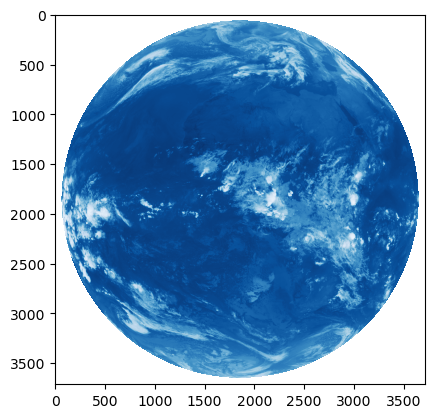

In [43]:
plt.imshow(scn['IR_120'], cmap="Blues")

In [44]:
from pyresample.utils import get_area_def
area_id = 'japan'
x_size = 2407
y_size = 1655
area_extent = [-600000.0, -600000.0, 6969000.0, 5069000.0]
projection = '+proj=merc +lat_0=52.5 +lon_0=5.5 +ellps=WGS84'
description = "Netherlands"
proj_id = 'merc.5_37.5'

areadef = get_area_def(area_id, description, proj_id, projection,x_size, y_size, area_extent)

/tmp/ipykernel_32245/828913651.py:10: UserWarning: 'get_area_def' has moved, import it with 'from pyresample import get_area_def'
  areadef = get_area_def(area_id, description, proj_id, projection,x_size, y_size, area_extent)
/home/mark/miniconda3/envs/torch/lib/python3.10/site-packages/pyproj/crs/crs.py:1296: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [45]:
local_scene = scn.resample(areadef)

/home/mark/miniconda3/envs/torch/lib/python3.10/site-packages/numpy/lib/function_base.py:1447: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


/home/mark/miniconda3/envs/torch/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/home/mark/miniconda3/envs/torch/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
/home/mark/miniconda3/envs/torch/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


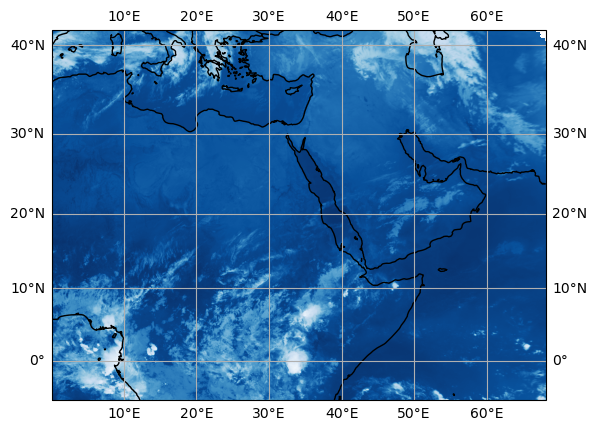

In [46]:
crs = local_scene['IR_120'].attrs['area'].to_cartopy_crs()
ax = plt.axes(projection=crs)

ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
plt.imshow(local_scene['IR_120'], transform=crs, extent=crs.bounds, origin='upper', cmap="Blues")
# cbar = plt.colorbar()
plt.show()

In [47]:
custom_area = create_area_def('my_area', projection=projection,
                              width=300, height=300,
                              area_extent=[-7, 40, 11, 58], units='degrees')

In [48]:
custom_scn = scn.resample(custom_area)

In [49]:
custom_scn['IR_120'].values.shape

(300, 300)

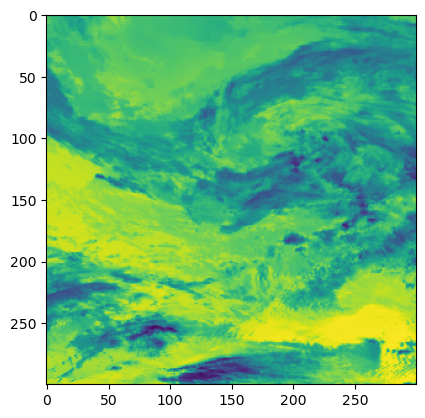

In [50]:
plt.imshow(custom_scn['IR_108'])

In [51]:
copy_of_data = np.array(custom_scn['IR_120'].values)

In [52]:
copy_of_data

array([[261.72968, 260.3027 , 259.0364 , ..., 265.54977, 264.86606,
        263.8316 ],
       [263.31033, 264.86606, 261.72968, ..., 266.5667 , 266.3979 ,
        265.0374 ],
       [263.136  , 264.52246, 265.54977, ..., 266.5667 , 264.86606,
        264.17764],
       ...,
       [278.0599 , 278.36258, 278.21136, ..., 283.10022, 281.93372,
        281.78708],
       [278.66443, 278.5136 , 278.5136 , ..., 282.66412, 280.6074 ,
        275.91827],
       [279.11572, 279.26578, 274.6757 , ..., 263.65817, 262.7863 ,
        251.84283]], dtype=float32)

In [53]:
copy_of_data[copy_of_data > 270] = 0

In [54]:
from matplotlib.colors import Normalize

In [55]:
np.max(copy_of_data)

269.88547

In [56]:
alphas = Normalize(0, 223, clip=True)(copy_of_data)

In [86]:
def plot_as_map(channel):
    alphas = Normalize(0, 223, clip=True)(channel)
    crs = channel.attrs['area'].to_cartopy_crs()
    ax = plt.axes(projection=crs)

    ax.coastlines()
    ax.gridlines(draw_labels=True)
    ax.set_global()
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    plt.imshow(custom_scn['IR_120'], transform=crs, extent=crs.bounds, origin='upper', alpha=alphas, cmap='Blues')
    # cbar = plt.colorbar()
    plt.show()
    

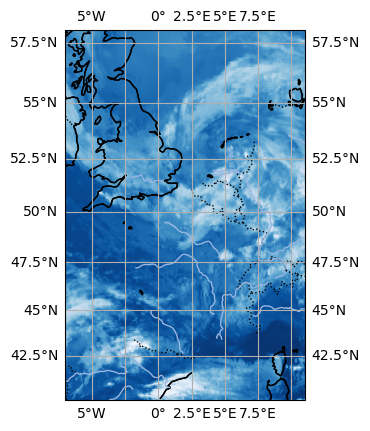

In [87]:
crs = custom_scn['IR_120'].attrs['area'].to_cartopy_crs()
ax = plt.axes(projection=crs)

ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
plt.imshow(custom_scn['IR_120'], transform=crs, extent=crs.bounds, origin='upper', alpha=alphas, cmap='Blues')
# cbar = plt.colorbar()
plt.show()

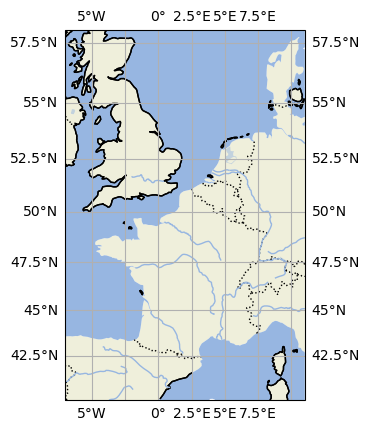

In [88]:
plot_as_map(custom_scn["IR_016"])

In [58]:
# plt.imshow(custom_scn['IR_120'], alpha=0.4)

In [59]:
from matplotlib.colors import Normalize

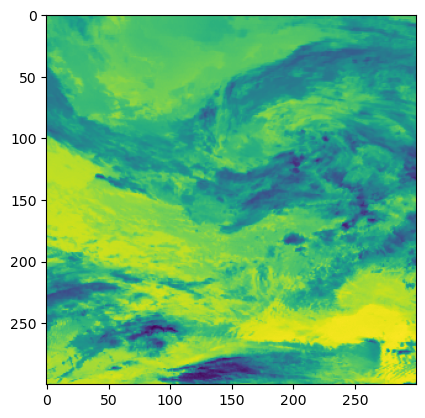

In [60]:
plt.imshow(custom_scn['IR_120'].values)

In [61]:
copy_of_values = custom_scn['IR_120'].values

In [62]:
copy_of_values

array([[261.72968, 260.3027 , 259.0364 , ..., 265.54977, 264.86606,
        263.8316 ],
       [263.31033, 264.86606, 261.72968, ..., 266.5667 , 266.3979 ,
        265.0374 ],
       [263.136  , 264.52246, 265.54977, ..., 266.5667 , 264.86606,
        264.17764],
       ...,
       [278.0599 , 278.36258, 278.21136, ..., 283.10022, 281.93372,
        281.78708],
       [278.66443, 278.5136 , 278.5136 , ..., 282.66412, 280.6074 ,
        275.91827],
       [279.11572, 279.26578, 274.6757 , ..., 263.65817, 262.7863 ,
        251.84283]], dtype=float32)

In [63]:
alphas = Normalize(0, 100, clip=True)(np.abs(custom_scn['IR_120'].values))

In [64]:
alphas

masked_array(
  data=[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [65]:
alphas = np.clip(alphas, 0, 1)

In [66]:
alphas

masked_array(
  data=[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

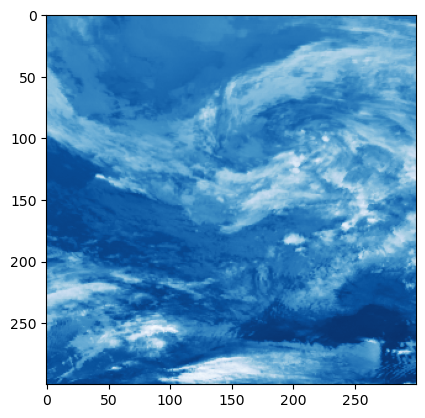

In [67]:
plt.imshow(custom_scn['IR_120'], alpha=alphas, cmap="Blues")

## Types of data
+ centered on the netherlands high quality
+ wider view low quality

In [120]:
scn = Scene(reader="seviri_l1b_native", filenames=['../data/satellite/MSG3-SEVI-MSG15-0100-NA-20230401125741.632000000Z-NA.nat'])
scn.load([
 'IR_016',
 'IR_039',
 'IR_087',
 'IR_097',
 'IR_108',
 'IR_120',
 'IR_134',
 'VIS006',
 'VIS008',
 'WV_062',
 'WV_073'], upper_right_corner="NE")

/home/mark/miniconda3/envs/torch/lib/python3.10/site-packages/satpy/readers/seviri_base.py:386: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataset.coords['acq_time'] = ('y', acq_time)
/home/mark/miniconda3/envs/torch/lib/python3.10/site-packages/satpy/readers/seviri_base.py:386: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or 

In [130]:
small_area = [0, 50, 10, 55]
big_area = [-5, 45, 15, 60]

mySmallArea = create_area_def('small', projection=projection,
                              width=300, height=300,
                              area_extent=small_area, units='degrees')


myBigArea = create_area_def('big', projection=projection,
                              width=300, height=300,
                              area_extent=big_area, units='degrees')

In [131]:
smallScn = scn.resample(mySmallArea)
bigScn = scn.resample(myBigArea)

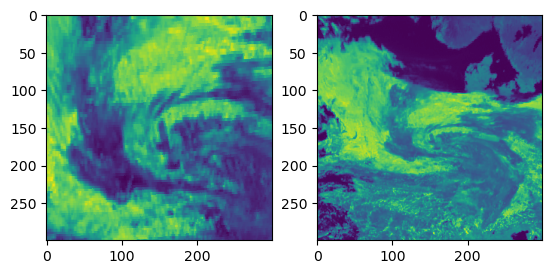

In [132]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(smallScn["IR_016"])
axs[1].imshow(bigScn["IR_016"])